<a href="https://colab.research.google.com/github/Aoisama11/Aoisama11/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Bank Marketing dataset...
Please upload the dataset file (e.g., bank-additional-full.csv).


Saving bank-full.csv to bank-full (3).csv
Dataset uploaded and loaded successfully!
Preprocessing the dataset...
Columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Splitting the dataset...
Training the Decision Tree Classifier...
Evaluating the model...
Accuracy: 0.76
Precision: 0.31
Recall: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     11977
           1       0.31      0.85      0.45      1587

    accuracy                           0.76     13564
   macro avg       0.64      0.80      0.65     13564
weighted avg       0.90      0.76      0.80     13564

Confusion Matrix:
[[8929 3048]
 [ 236 1351]]


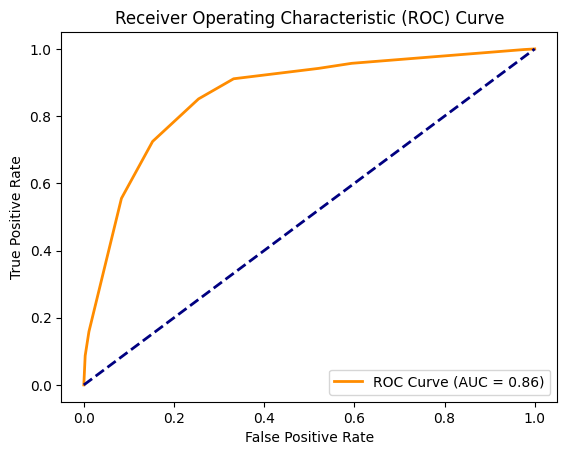

Visualizing the Decision Tree...


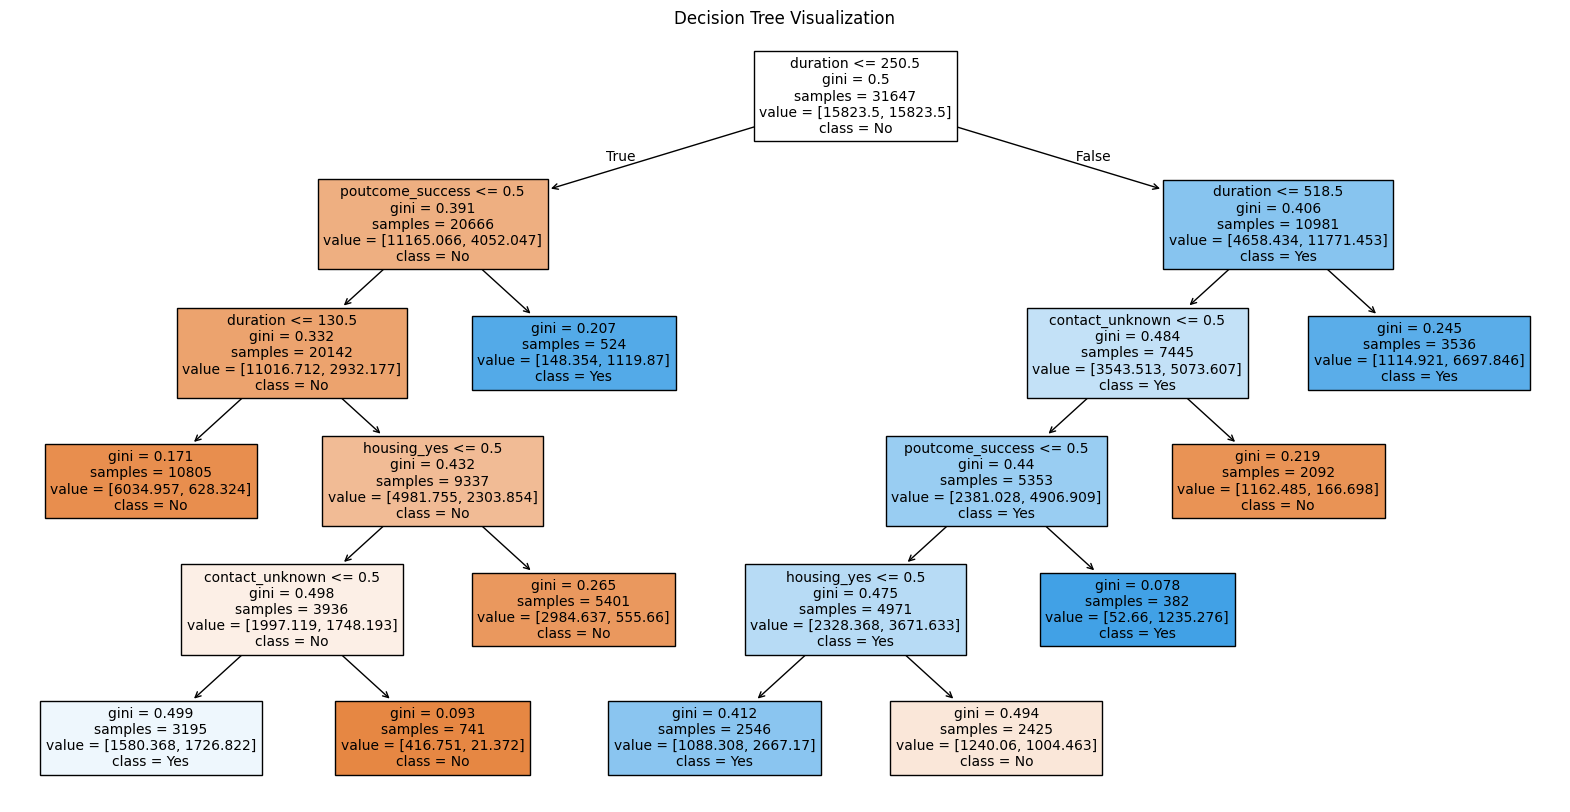

Extracting Decision Tree Rules...
Decision Tree Rules:
|--- duration <= 250.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 130.50
|   |   |   |--- class: 0
|   |   |--- duration >  130.50
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- contact_unknown <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- contact_unknown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- housing_yes >  0.50
|   |   |   |   |--- class: 0
|   |--- poutcome_success >  0.50
|   |   |--- class: 1
|--- duration >  250.50
|   |--- duration <= 518.50
|   |   |--- contact_unknown <= 0.50
|   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- housing_yes >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- poutcome_success >  0.50
|   |   |   |   |--- class: 1
|   |   |--- contact_unknown >  0.50
|   |   |   |--- class: 0
|   |--- duration >  518.50
|   |   |--- class: 1



In [22]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Load the dataset
def load_data():
    """
    Load the Bank Marketing dataset from the uploaded file in Google Colab.
    """
    try:
        # Prompt the user to upload the dataset manually
        print("Please upload the dataset file (e.g., bank-additional-full.csv).")
        uploaded = files.upload()
        file_name = list(uploaded.keys())[0]  # Get the uploaded file name
        data = pd.read_csv(file_name, sep=';')  # Read the CSV file
        print("Dataset uploaded and loaded successfully!")
    except Exception as e:
        print(f"Error while loading the dataset: {e}")
        data = None

    return data

# Step 2: Preprocess the data
def preprocess_data(data):
    """
    Preprocess the dataset for training.
    - Convert target column ('y') to binary (1 for 'yes', 0 for 'no').
    - Encode categorical variables using One-Hot Encoding.
    """
    print("Columns in the dataset:", data.columns)
    if 'y' not in data.columns:
        raise KeyError("The target column 'y' is missing in the dataset.")

    # Convert target column ('y') to binary
    data['y'] = (data['y'] == 'yes').astype(int)

    # Encode categorical features using One-Hot Encoding
    data = pd.get_dummies(data, drop_first=True)

    # Separate features (X) and target (y)
    X = data.drop(columns=['y'])
    y = data['y']

    return X, y

# Step 3: Split the dataset
def split_data(X, y):
    """
    Split the dataset into training and testing sets.
    """
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Train the Decision Tree Classifier
def train_model(X_train, y_train, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10):
    """
    Train a Decision Tree Classifier with pruning parameters.
    """
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        max_leaf_nodes=max_leaf_nodes,
        min_samples_leaf=min_samples_leaf,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

# Step 5: Evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model using accuracy, precision, recall, and other metrics.
    """
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Optional: Plot ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Step 6: Visualize Decision Tree using sklearn's plot_tree
def visualize_tree(model, feature_names):
    """
    Visualize the decision tree using Matplotlib and sklearn's plot_tree.
    """
    plt.figure(figsize=(20, 10))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=["No", "Yes"],
        filled=True,
        fontsize=10
    )
    plt.title("Decision Tree Visualization")
    plt.show()

# Step 7: Extract Decision Rules
def print_decision_rules(model, feature_names):
    """
    Print the decision rules from the trained Decision Tree model in plain English.
    Parameters:
    - model: Trained Decision Tree classifier.
    - feature_names: List of feature names used in the model.
    """
    # Generate and print decision rules
    tree_rules = export_text(model, feature_names=feature_names)
    print("Decision Tree Rules:")
    print(tree_rules)

# Main function
def main():
    """
    Main function to run the decision tree classifier pipeline.
    """
    print("Loading the Bank Marketing dataset...")
    data = load_data()

    print("Preprocessing the dataset...")
    X, y = preprocess_data(data)

    print("Splitting the dataset...")
    X_train, X_test, y_train, y_test = split_data(X, y)

    print("Training the Decision Tree Classifier...")
    model = train_model(X_train, y_train)

    print("Evaluating the model...")
    evaluate_model(model, X_test, y_test)

    print("Visualizing the Decision Tree...")
    visualize_tree(model, feature_names=list(X_train.columns))

    print("Extracting Decision Tree Rules...")
    print_decision_rules(model, feature_names=list(X_train.columns))

if __name__ == "__main__":
    main()